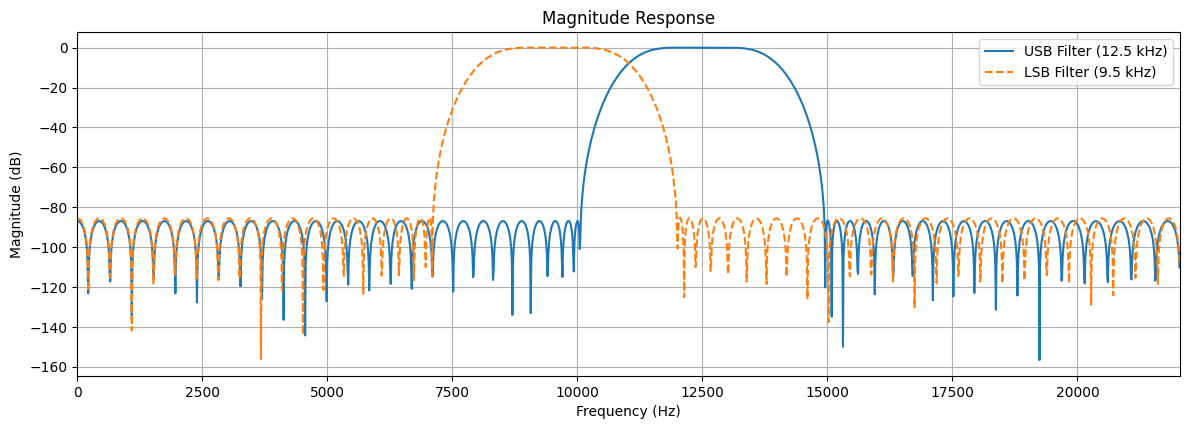

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sampling frequency
fs = 44100  # 44.1 kHz

# USB filter coefficients (centered at 12.5 kHz, array 1)
coeffs_usb = [
    0.000077220197574123, -1.694364742523110E-6, -0.000247376363569229, 0.000172349071145931,
    0.000442532978562303, -0.000587921806885401, -0.000490796464995067, 0.001245366873040035,
    0.000130200340800485, -0.001862166817785674, 0.000703051894342210, 0.002007465586182165,
    -0.001685724919682768, -0.001407920138837247, 0.002116180748678689, 0.000372547212250720,
    -0.001360627435518710, 0.000104411160061938, -0.000488583862643263, 0.001171803660774852,
    0.002230271567546280, -0.004622738899125535, -0.001988597303309669, 0.009091087568736349,
    -0.001507388998028951, -0.012022955491491360, 0.007518507241432481, 0.010969367705405847,
    -0.012943254772900497, -0.005724754564656228, 0.013800759554407906, -0.000413209911619933,
    -0.008117888769062576, 0.001659860856017020, -0.001521029232922352, 0.006868472137034775,
    0.007858709633466776, -0.025100680515366711, -0.002212548908150258, 0.046023064611360000,
    -0.020182170398250168, -0.057755470091797719, 0.055819871330333046, 0.049337804826868066,
    -0.092667374657917745, -0.017292461343810531, 0.114978094867627500, -0.030993743432389236,
    -0.111032169995744168, 0.079554595102602668, 0.079554595102602668, -0.111032169995744168,
    -0.030993743432389236, 0.114978094867627500, -0.017292461343810531, -0.092667374657917745,
    0.049337804826868066, 0.055819871330333046, -0.057755470091797719, -0.020182170398250168,
    0.046023064611360000, -0.002212548908150258, -0.025100680515366711, 0.007858709633466776,
    0.006868472137034775, -0.001521029232922352, 0.001659860856017020, -0.008117888769062576,
    -0.000413209911619933, 0.013800759554407906, -0.005724754564656228, -0.012943254772900497,
    0.010969367705405847, 0.007518507241432481, -0.012022955491491360, -0.001507388998028951,
    0.009091087568736349, -0.001988597303309669, -0.004622738899125535, 0.002230271567546280,
    0.001171803660774852, -0.000488583862643263, 0.000104411160061938, -0.001360627435518710,
    0.000372547212250720, 0.002116180748678689, -0.001407920138837247, -0.001685724919682768,
    0.002007465586182165, 0.000703051894342210, -0.001862166817785674, 0.000130200340800485,
    0.001245366873040035, -0.000490796464995067, -0.000587921806885401, 0.000442532978562303,
    0.000172349071145931, -0.000247376363569229, -1.694364742523110E-6, 0.000077220197574123
]

# LSB filter coefficients (centered at 9.5 kHz, array 2)
coeffs_lsb = [
    -0.000010523800014581, -0.000122681642892022, -0.000036415773389628, 0.000305793174245558,
    0.000283565937180380, -0.000472031799665594, -0.000804098046625973, 0.000378709203535162,
    0.001479276230080921, 0.000183083088650831, -0.001941975044915265, -0.001135526486858456,
    0.001772511141387945, 0.001963039344977544, -0.000908490376865581, -0.001916521667456298,
    -0.000020006590571434, 0.000602618449322109, -0.000173651213944996, 0.001394251556711564,
    0.002470013673232240, -0.002448216941233300, -0.006628534787491658, 0.000759869709492400,
    0.010735891124917961, 0.004155599503225747, -0.012018010710235907, -0.010389082153523428,
    0.008810696972067640, 0.014105829623790958, -0.002524099694416429, -0.011858498891210132,
    -0.002042840172782165, 0.003626318880290195, -0.001030976719610831, 0.005542290777138538,
    0.014722151249366884, -0.007046559790046048, -0.035610017720202412, -0.006654434845418102,
    0.053711019474210531, 0.036665440452510710, -0.056625604477486352, -0.074954104576882299,
    0.036276347208572125, 0.106669361716220323, 0.005549784942170579, -0.116927488293852577,
    -0.056465510909489432, 0.098576362058282713, 0.098576362058282713, -0.056465510909489432,
    -0.116927488293852577, 0.005549784942170579, 0.106669361716220323, 0.036276347208572125,
    -0.074954104576882299, -0.056625604477486352, 0.036665440452510710, 0.053711019474210531,
    -0.006654434845418102, -0.035610017720202412, -0.007046559790046048, 0.014722151249366884,
    0.005542290777138538, -0.001030976719610831, 0.003626318880290195, -0.002042840172782165,
    -0.011858498891210132, -0.002524099694416429, 0.014105829623790958, 0.008810696972067640,
    -0.010389082153523428, -0.012018010710235907, 0.004155599503225747, 0.010735891124917961,
    0.000759869709492400, -0.006628534787491658, -0.002448216941233300, 0.002470013673232240,
    0.001394251556711564, -0.000173651213944996, 0.000602618449322109, -0.000020006590571434,
    -0.001916521667456298, -0.000908490376865581, 0.001963039344977544, 0.001772511141387945,
    -0.001135526486858456, -0.001941975044915265, 0.000183083088650831, 0.001479276230080921,
    0.000378709203535162, -0.000804098046625973, -0.000472031799665594, 0.000283565937180380,
    0.000305793174245558, -0.000036415773389628, -0.000122681642892022, -0.000010523800014581
]

# Compute frequency response
w, h_usb = freqz(coeffs_usb, worN=2048, fs=fs)
w, h_lsb = freqz(coeffs_lsb, worN=2048, fs=fs)

# Magnitude in dB
mag_usb = 20 * np.log10(np.abs(h_usb))
mag_lsb = 20 * np.log10(np.abs(h_lsb))

# Phase in degrees
phase_usb = np.angle(h_usb, deg=True)
phase_lsb = np.angle(h_lsb, deg=True)

# Phase difference (wrapped to [-180, 180] degrees)
phase_diff = np.angle(np.exp(1j * (phase_usb - phase_lsb) * np.pi / 180)) * 180 / np.pi

# Plotting
plt.figure(figsize=(12, 12))

# Magnitude response
plt.subplot(3, 1, 1)
plt.plot(w, mag_usb, label='USB Filter (12.5 kHz)')
plt.plot(w, mag_lsb, label='LSB Filter (9.5 kHz)', linestyle='--')
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.xlim(0, fs/2)

plt.tight_layout()
plt.show()